# Customer Churn Prediction (Bank Customers)

## Objective:
Identify customers who are likely to leave the bank

### Importing necessary libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImpPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve 

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('3. Data\Churn_Modelling.csv')

## Exploratory Data Analysis (EDA):

In [6]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# examining each column's data and its type

for i in df.columns:
    print(i, df[i].unique(), df[i].dtype)
    print('-'* 100)

RowNumber [    1     2     3 ...  9998  9999 10000] int64
----------------------------------------------------------------------------------------------------
CustomerId [15634602 15647311 15619304 ... 15584532 15682355 15628319] int64
----------------------------------------------------------------------------------------------------
Surname ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge'] object
----------------------------------------------------------------------------------------------------
CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461

**The Data set is clean having no null values and all columns are in correct data type.**

## Univariate Analysis

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
total = len(df.columns)
total

14

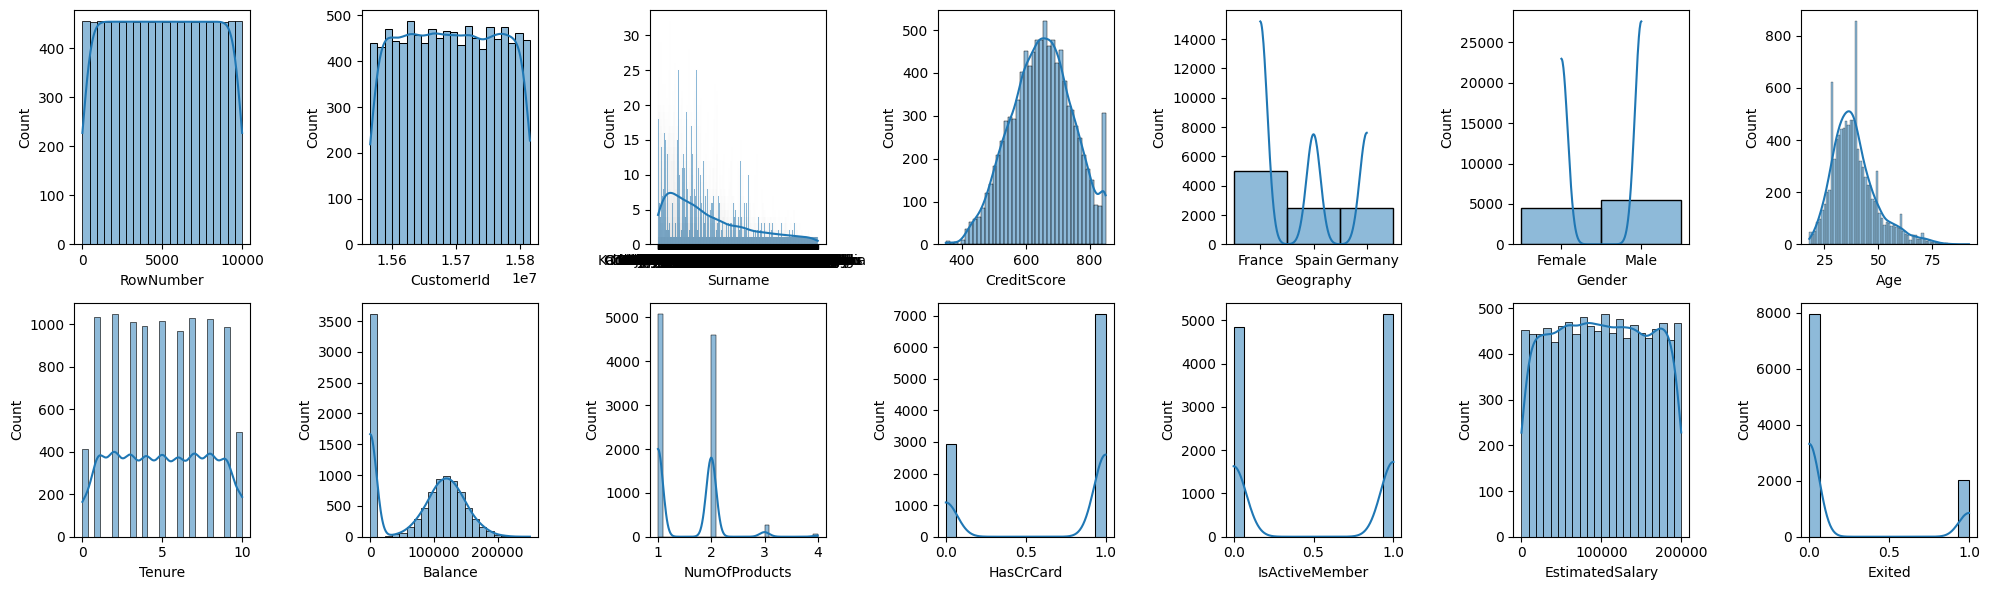

In [13]:
total = len(df.columns)
cols_per_row = 7
rows = (total + cols_per_row - 1) // cols_per_row  # ensures ceiling division

plt.figure(figsize=(20, 6))

for idx, col in enumerate(df.columns):
    plt.subplot(rows, cols_per_row, idx + 1)
    sns.histplot(df[col], kde=True)
    plt.tight_layout()

plt.show()

## Bi-Variate Analysis:

In [ ]:
sns.pairplot(df, corner=True)
plt.show()

In [17]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
X = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [19]:
X_cat = [col for col in X.columns if X[col].dtype == 'object']
X_num = [col for col in X.columns if X[col].dtype != 'object']

In [20]:
X[X_cat] = OrdinalEncoder().fit_transform(X[X_cat]) # Encoding Categorical Data

In [21]:
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58


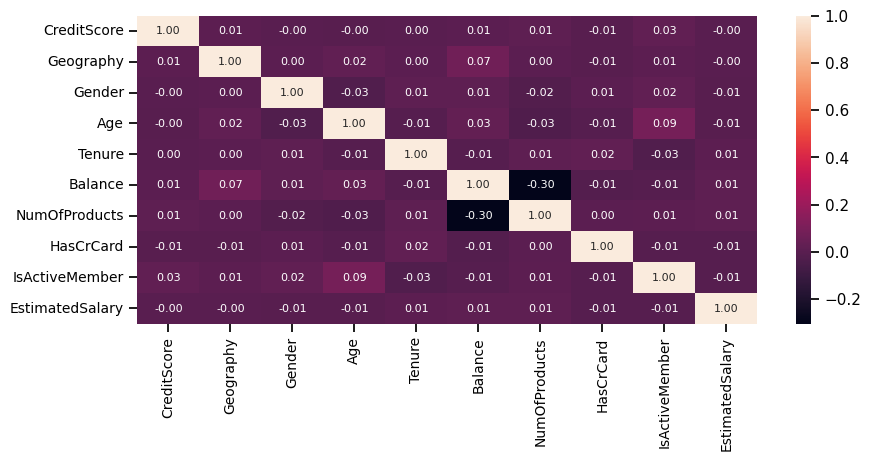

In [79]:
# Correlation with heat map
corr_overall = X.corr()

plt.figure(figsize=(10,4))

a = sns.heatmap(corr_overall, annot=True, annot_kws={"size": 8}, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90, fontsize=10)
roty = a.set_yticklabels(a.get_yticklabels(), fontsize=10)

## Machine Learning Modelling:

### 1. Linear Regression Model:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) # stratify=y (maintain class balance in both train and test sets)

# LogisticRegression Model Training
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)
print('Linear Regression Report:\n\n', classification_report(y_test, y_pred))

Linear Regression Report:

               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1593
           1       0.46      0.06      0.10       407

    accuracy                           0.79      2000
   macro avg       0.63      0.52      0.49      2000
weighted avg       0.73      0.79      0.73      2000



### 2. DecisionTreeClassifier Model:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) # stratify=y (maintain class balance in both train and test sets)

# LogisticRegression Model Training
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)

y_pred = DTC_model.predict(X_test)
print('Decision Tree Classifier Report:\n\n', classification_report(y_test, y_pred))

Decision Tree Classifier Report:

               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1593
           1       0.47      0.53      0.50       407

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.79      0.78      0.79      2000



Decision Tree Regressor is performing much better than the linear model i.e. Random Forest Regression

### 3. RandomForestClassifier Model:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) # stratify=y (maintain class balance in both train and test sets)

# LogisticRegression Model Training
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, y_train)

y_pred = RFC_model.predict(X_test)
print('Random Forest Classifier Report:\n\n', classification_report(y_test, y_pred))

Random Forest Classifier Report:

               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.42      0.55       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



This is performing even better than Decision Tree Regressor.

## 4. ExtraTreesClassifier Model:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) # stratify=y (maintain class balance in both train and test sets)

# LogisticRegression Model Training
ETC_model = ExtraTreesClassifier()
ETC_model.fit(X_train, y_train)

y_pred = ETC_model.predict(X_test)
print('Extra Trees Classifier Report:\n\n', classification_report(y_test, y_pred))

Extra Trees Classifier Report:

               precision    recall  f1-score   support

           0       0.88      0.96      0.91      1593
           1       0.73      0.48      0.58       407

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



### 5. XGBoost Classifier:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) # stratify=y (maintain class balance in both train and test sets)

# LogisticRegression Model Training
XGBC_model = XGBClassifier()
XGBC_model.fit(X_train, y_train)

y_pred = XGBC_model.predict(X_test)
print('XGBoost Classifier Report:\n\n', classification_report(y_test, y_pred))

XGBoost Classifier Report:

               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.68      0.49      0.57       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



### 5. VotingClassifier Model:

In [36]:
# Create VotingClassifier
VC_model = VotingClassifier(estimators=[
    ('lr', LR_model), 
    ('dt', DTC_model), 
    ('rf', RFC_model), 
    ('et', ETC_model), 
    ('xgb', XGBC_model)
], voting='hard')  # or 'soft'

# Train and predict
VC_model.fit(X_train, y_train)
y_pred = VC_model.predict(X_test)

# Evaluation
print("Voting Classifier Report:\n\n", classification_report(y_test, y_pred))


Voting Classifier Report:

               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.42      0.54       407

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to collect importances
importances_dict = {}

# Feature names
feature_names = X_train.columns

# Get importances from models that support it
models_with_importance = {
    'Decision Tree': DTC_model,
    'Random Forest': RFC_model,
    'Extra Trees': ETC_model,
    'XGBoost': XGBC_model
}

for name, model in models_with_importance.items():
    importances = model.feature_importances_
    importances_dict[name] = importances

# Convert to DataFrame
importance_df = pd.DataFrame(importances_dict, index=feature_names)

# Add a column with the mean importance across models
importance_df['Mean'] = importance_df.mean(axis=1)

# Sort by mean importance
importance_df_sorted = importance_df.sort_values(by='Mean', ascending=False)

# Show top features
importance_df_sorted

,Decision Tree,Random Forest,Extra Trees,XGBoost,Mean
Age,0.227491,0.234488,0.242805,0.124244,0.207257
NumOfProducts,0.109709,0.136650,0.142779,0.324638,0.178444
EstimatedSalary,0.167053,0.148416,0.131351,0.037370,0.121048
Balance,0.154531,0.138313,0.125224,0.054115,0.118046
CreditScore,0.144009,0.146048,0.132430,0.037817,0.115076
IsActiveMember,0.058773,0.043432,0.037641,0.220747,0.090148
Tenure,0.067099,0.079223,0.105152,0.032430,0.070976
Geography,0.033972,0.034981,0.042412,0.085219,0.049146
HasCrCard,0.022852,0.019216,0.022420,0.036051,0.025135
Gender,0.014511,0.019233,0.017785,0.047369,0.024725


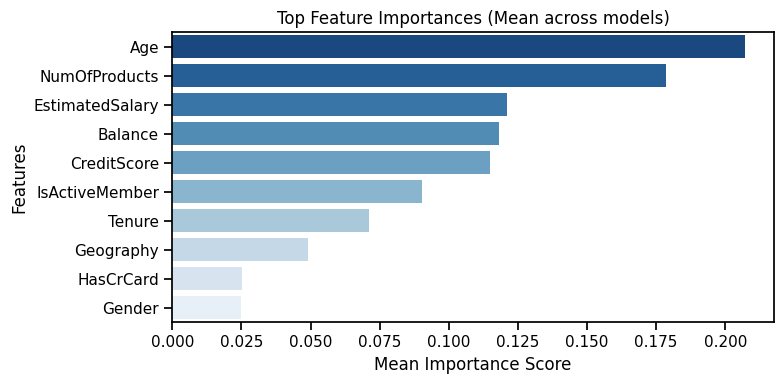

In [38]:
# Plot

plt.figure(figsize=(8, 4))
sns.barplot(x=importance_df_sorted['Mean'], y=importance_df_sorted.index, palette='Blues_r')
plt.title('Top Feature Importances (Mean across models)')
plt.xlabel('Mean Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()